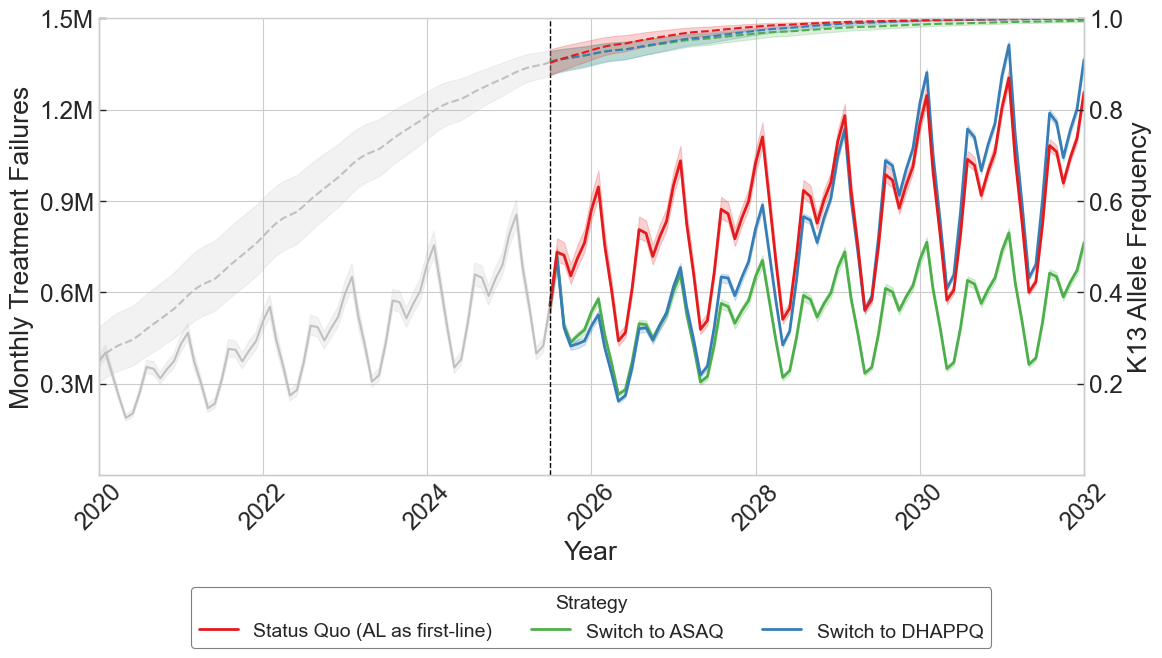

In [2]:
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.patches import Rectangle
from matplotlib.lines import Line2D
import pandas as pd

# Adjust the y-axis to show values in millions
def millions_formatter(x, pos):
    return f'{x * 1e-6:.1f}M'  # Formats in millions with one decimal point

# --- Load and Prepare Data ---
csv_path = "./data/fig1_data.csv"  # Adjust path as needed
df = pd.read_csv(csv_path)
df['date'] = pd.to_datetime(df['date'])

# Filter scenarios
scenarios_to_plot = ["status_quo", "asaq", "dhappq"]
filtered_data = df[df['scenario'].isin(scenarios_to_plot)]
critical_point = pd.to_datetime("2025-07-01")

# --- Plot Configuration ---
# Update color scheme based on performance ranking
colors = {
    "asaq": "#4daf4a",       # Green: Best (ASAQ)
    "dhappq": "#377eb8",     # Purple: Intermediate (DHAPPQ)
    "status_quo": "#e41a1c", # Red: Worst (Status Quo)
}

pre_policy_color = "#c0c0c0"

# Determine tick positions
left_yticks = [0.3e6, 0.6e6, 0.9e6, 1.2e6, 1.5e6]
right_yticks = [tick / 1.5e6 for tick in left_yticks]  # normalize to [0, 1]

# Recreate the plot
fig, ax1 = plt.subplots(figsize=(12, 8))
ax2 = ax1.twinx()

sns.set_context("paper", font_scale=2)
sns.set_style("whitegrid")
pre = filtered_data[(filtered_data["date"] <= critical_point)]
sns.lineplot(data=pre, x='date', y='total_treatmentfailures', ax=ax1,
                 color=pre_policy_color, lw=1.5, alpha=1, zorder=1, errorbar=("pi", 90))
sns.lineplot(data=pre, x='date', y='k13_frequency', ax=ax2,
                 color=pre_policy_color, lw=1.5, alpha=1, zorder=1, linestyle='--',errorbar=("pi", 90))
# Plot lines
for scenario in colors:

    post = filtered_data[(filtered_data["scenario"] == scenario) & (filtered_data["date"] >= critical_point)]


    sns.lineplot(data=post, x='date', y='total_treatmentfailures', ax=ax1,
                 color=colors[scenario], lw=2, zorder=2,errorbar=("pi", 90))


    sns.lineplot(data=post, x='date', y='k13_frequency', ax=ax2,
                 color=colors[scenario], lw=1.5, zorder=2, linestyle='--',errorbar=("pi", 90))

# Background & vertical policy line
x_start = mdates.date2num(filtered_data['date'].min())
x_end = mdates.date2num(critical_point)
# ax1.add_patch(Rectangle((x_start, 0), x_end - x_start, 1.5e6, transform=ax1.transData,
                        # color=pre_policy_color, alpha=0.3, zorder=0))
ax1.axvline(critical_point, color='black', linestyle='--', lw=1, zorder=3)

# Axes setup
ax1.set_ylabel("Monthly Treatment Failures")
ax1.set_ylim([0, 1.5e6])
ax1.set_yticks(left_yticks)
ax1.yaxis.set_major_formatter(mticker.FuncFormatter(millions_formatter))

ax2.set_ylabel("K13 Allele Frequency")
ax2.set_ylim([0, 1.0])
ax2.set_yticks(right_yticks)
ax2.yaxis.set_major_formatter(mticker.FuncFormatter(lambda x, pos: f"{x:.1f}"))

# X-axis formatting
ax1.set_xlim([pd.to_datetime("2020-01-01"), pd.to_datetime("2032-01-01")])
ax1.set_xlabel("Year")
ax1.xaxis.set_major_locator(mdates.YearLocator(2))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

# Grid & ticks
ax1.grid(True, axis='both')
ax2.grid(False)
ax1.tick_params(axis='x', rotation=45)
ax1.tick_params(axis='both', direction='in')
ax2.tick_params(axis='both', direction='in')

# Legend
legend_labels = {
    "status_quo": "Status Quo (AL as first-line)",
    "asaq": "Switch to ASAQ",
    "dhappq": "Switch to DHAPPQ"
}
custom_lines = [Line2D([0], [0], color=colors[key], lw=2) for key in legend_labels]
leg = ax1.legend(custom_lines, [legend_labels[k] for k in legend_labels],
           title="Strategy", frameon=True, fancybox=True, framealpha=1,
           facecolor='white', edgecolor='gray', fontsize=14, title_fontsize=14,
            loc='lower center', bbox_to_anchor=(0.5, -0.4),ncol=3
           )
frame = leg.get_frame()
frame.set_facecolor('white')
frame.set_alpha(1)
frame.set_edgecolor('gray')

sns.despine(ax=ax1, right=False)
plt.tight_layout(rect=[0, 0.05, 1, 1])
# plt.savefig("fig4_dual_axis.pdf", bbox_inches='tight')
plt.savefig("figure_1.png", dpi=300, bbox_inches='tight')
plt.show()
